Thinkorswim API guide. 

__API__  - a set of functions and procedures allowing the creation of applications that access the features or data of an operating system, application, or other service.

AS of writing this blog, TD's APIs numbered 11 types: 
 - Accounts and Trading
 - Authentication
 - Instruments 
 - Market Hours
 - Movers
 - Options Chains
 - Price HIstory
 - Quotes
 - Transaction History
 - User info and Preferences
 - Watchlist
 
 More info, can be seen in the figure below: 

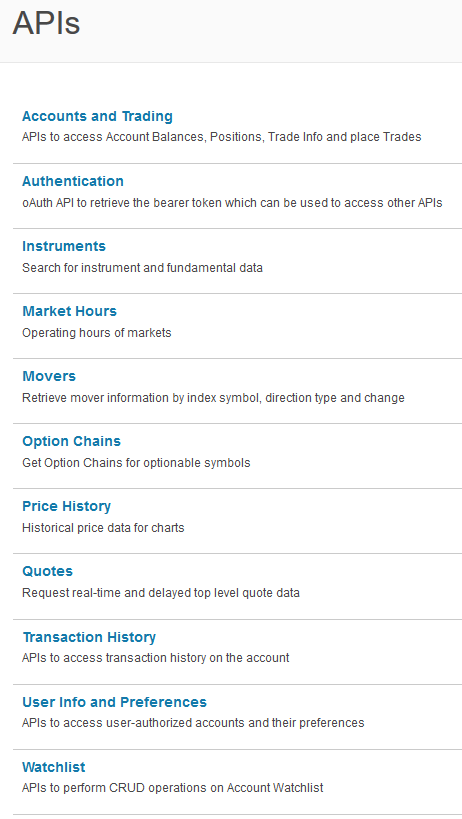

In order to use the thinkorswim API we first need to register: 

First, this is the address for the tdameritrade api: 

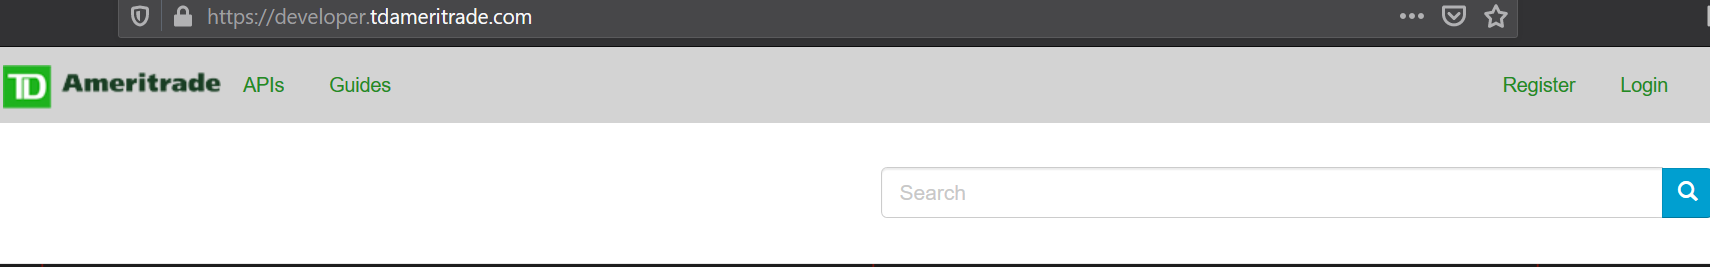

Then register with tdameritrade. The pre-qualification part of the 
registration is quick, fill out the below through TD's website. 



As seen below, all we need to run the api is __import request__. The rest of the library included below is for data manipulation and a few EDA.


In [1]:
import requests
import os


import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



After we've registered, we are now ready to request our data from thinkorswim. Here is the parameters we need to incorporate in our code in order to pull the data from TD.

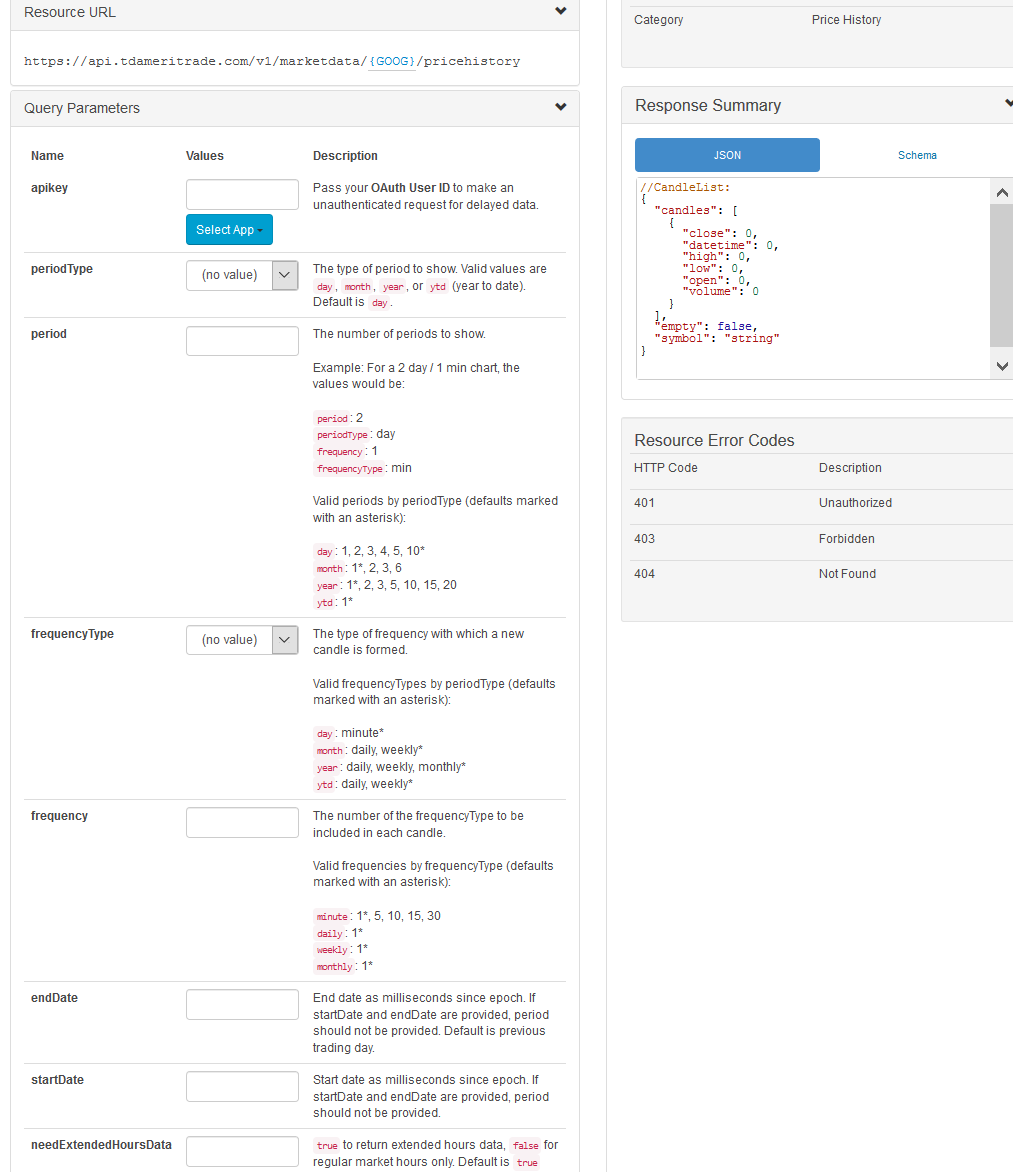

From the picture above we can see that we need the following parameteres: 
 - apikey
 - periodType
 - frequencyType
 - frequency
 - endDate
 - startDate
 - needExtendedHoursData

In [2]:

#define our endpoint

url = r"https://api.tdameritrade.com/v1/marketdata/{}/pricehistory".format('GOOG')


constant ={'apikey':os.environ['api'],
          'periodType': 'day',
          'period':'2',
          'frequencyType':'minute',
          'frequency':'1',
          'endDate': '1572195088000',
          'startDate':'1546361488000',
          'needExtendedHoursData':'true'}

# make a request
content = requests.get(url = url, params = constant)

data = content.json()

We then change the data into a dataframe using pandas as seen below.

Also, we'll do some EDA base on our data.

In [3]:
GOOG = pd.DataFrame(data['candles'], columns =['open', 'high', 'low', 'close','volume','datetime'])

In [4]:
GOOG.head(5)

,open,high,low,close,volume,datetime
0,1225.41,1225.4100,1225.01,1225.0100,900,1569862020000
1,1224.83,1224.8300,1224.67,1224.7800,500,1569862080000
2,1224.39,1224.3900,1224.39,1224.3900,100,1569862140000
3,1224.48,1224.5587,1224.28,1224.2800,535,1569862200000
4,1223.99,1224.0764,1223.99,1224.0764,235,1569862260000


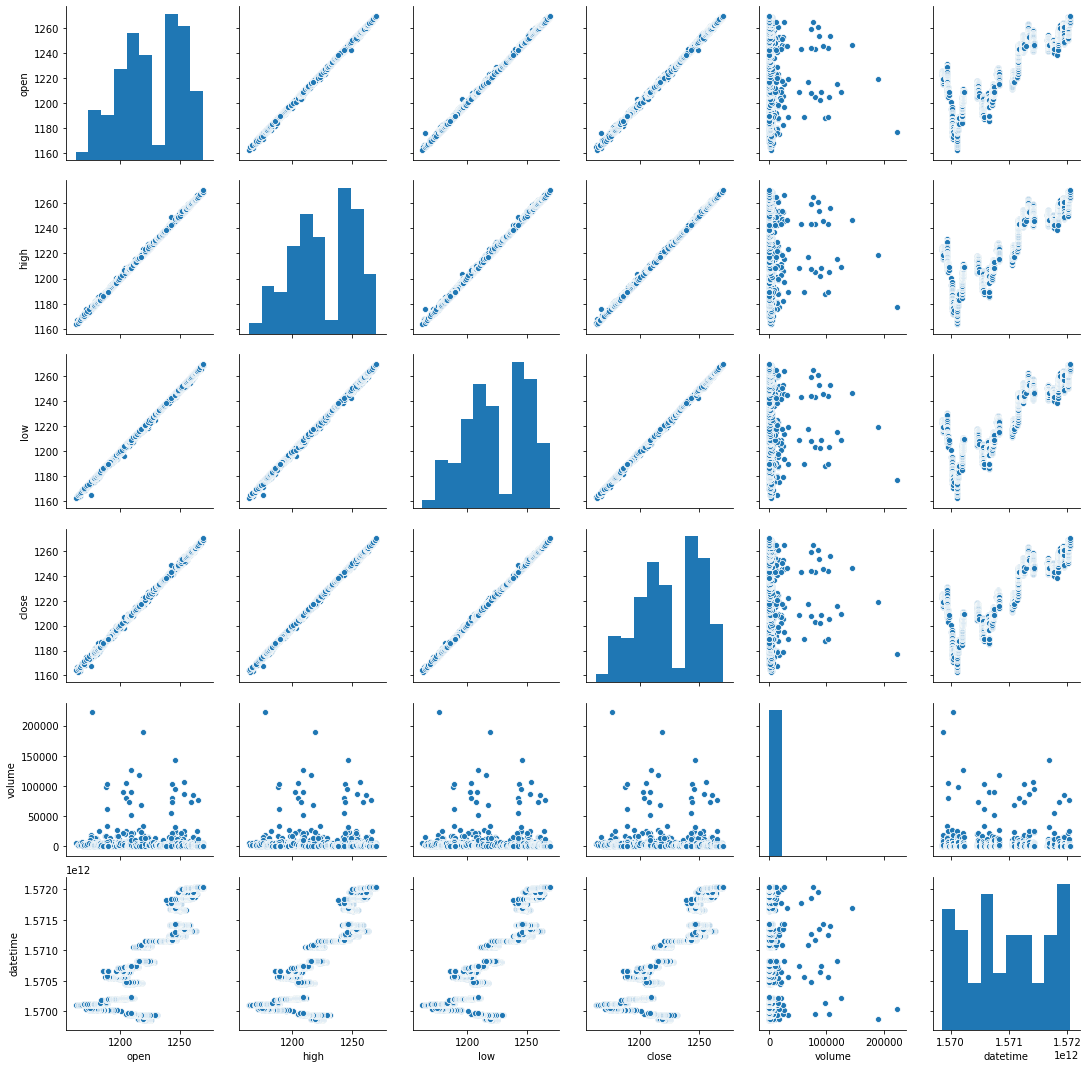

In [5]:
sns.pairplot(GOOG)